## 银行数据分析师 坏账率

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
# 让图表直接在 Jupyter Notebook 中展示出来
%matplotlib inline

# 解决中文乱码问题
plt.rcParams['font.sans-serif'] = ['SimHei']

# 解决负号无法正常显示的问题
plt.rcParams['axes.unicode_minus'] = False

# 将图表设置成矢量图格式显示
% config InlineBackend.figure_format = 'svg'



data = pd.read_csv('./loan.csv',encoding='gbk')
data.info()

# 月收入有缺失值，进行填充
data=data.fillna({'月收入':data['月收入'].mean()})
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 6 columns):
用户ID    150000 non-null int64
好坏客户    150000 non-null int64
年龄      150000 non-null int64
负债率     150000 non-null float64
月收入     120269 non-null float64
家属数量    146076 non-null float64
dtypes: float64(3), int64(3)
memory usage: 6.9 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 6 columns):
用户ID    150000 non-null int64
好坏客户    150000 non-null int64
年龄      150000 non-null int64
负债率     150000 non-null float64
月收入     150000 non-null float64
家属数量    146076 non-null float64
dtypes: float64(3), int64(3)
memory usage: 6.9 MB


,用户ID,好坏客户,年龄,负债率,月收入,家属数量
count,150000.000000,150000.000000,150000.000000,150000.000000,1.500000e+05,146076.000000
mean,75000.500000,0.066840,52.295207,353.005076,6.670221e+03,0.757222
std,43301.414527,0.249746,14.771866,2037.818523,1.288045e+04,1.115086
min,1.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000
25%,37500.750000,0.000000,41.000000,0.175074,3.903000e+03,0.000000
50%,75000.500000,0.000000,52.000000,0.366508,6.600000e+03,0.000000
75%,112500.250000,0.000000,63.000000,0.868254,7.400000e+03,1.000000
max,150000.000000,1.000000,109.000000,329664.000000,3.008750e+06,20.000000


## 是不是收入越高的人坏账率越低

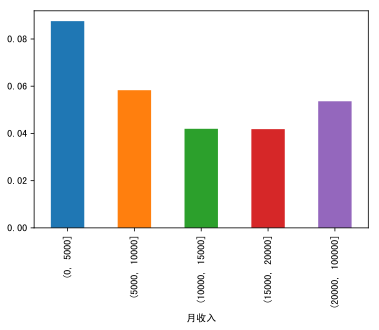

In [12]:
# 因为月收入属于连续值，一般将连续值离散化
cut_bins = [0,5000,10000,15000,20000,100000]
income_cut=pd.cut(data['月收入'],cut_bins)
income_cut
all_income_users = data['好坏客户'].groupby(income_cut).count()
bad_income_users = data['好坏客户'].groupby(income_cut).sum()
bad_rate = bad_income_users/all_income_users
bad_rate
bad_rate.plot.bar()

## 年龄和坏账率有什么关系

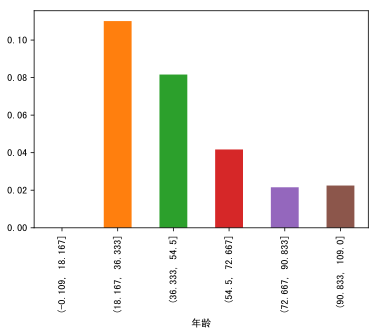

In [16]:
# 年龄也是连续值
age_cut=pd.cut(data["年龄"],6)
all_age_user = data["好坏客户"].groupby(age_cut).count()
bad_age_user = data["好坏客户"].groupby(age_cut).sum()
bad_rate = bad_age_user/all_age_user
bad_rate
bad_rate.plot.bar()

## 家庭人口数量和坏账率的关系